In [51]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [52]:
# Get ready
dir_ctv_hbo = "/home/pbarletta/labo/20/cph_obp/run/ctv/hbond"

aa = 119
nstlim = 19500
phs = collect(30:5:75)
idx = collect(1:10)
pdt_steps = collect(0:1:7)
titratable_cnt = 36
titratable_resis = [4, 5, 7, 11, 13, 18, 20, 24, 27, 30, 33, 37, 39,
    40, 41, 42, 48, 52, 58, 59, 64, 69, 73, 77, 78, 82, 87, 93, 94,
    97, 99, 102, 109, 111, 114, 117];
titratable_resnames = ["GL4", "GL4", "LYS", "HIP", "GL4", "LYS", "GL4", "AS4", "LYS",
    "AS4", "GL4", "AS4", "GL4", "AS4", "LYS", "LYS", "GL4", "LYS",
    "AS4", "LYS", "LYS", "LYS", "GL4", "AS4", "GL4", "LYS", "AS4",
    "GL4", "GL4", "HIP", "LYS", "LYS", "LYS", "LYS", "LYS", "AS4"]

idx_of_titratable = fill(0, aa)
[ idx_of_titratable[titratable_resis[i]] = i for i in 1:titratable_cnt ];

titratable_residues = [ string(titratable_resnames[i], "_", titratable_resis[i]) 
    for i in 1:titratable_cnt ];

In [53]:
for i in 1:10
    global nhb_ctv_idx = convert(Array{Float64, 1}, readdlm(joinpath(dir_ctv_hbo, string(idx[i]),
            string("nhb_ctv_", idx[i])))[2:end, 2])
    global nhb_ctv_phs = convert(Array{Float64, 1}, readdlm(joinpath(dir_ctv_hbo, string(phs[i], "ph"),
            string("nhb_ctv_", phs[i])))[2:end, 2])

    sym_nhb_ctv_idx = Symbol("nhb_ctv_", idx[i])
    sym_nhb_ctv_phs = Symbol("nhb_ctv_", phs[i])
    eval(:($sym_nhb_ctv_idx = nhb_ctv_idx))
    eval(:($sym_nhb_ctv_phs = nhb_ctv_phs))
end

## hbonds count por pH

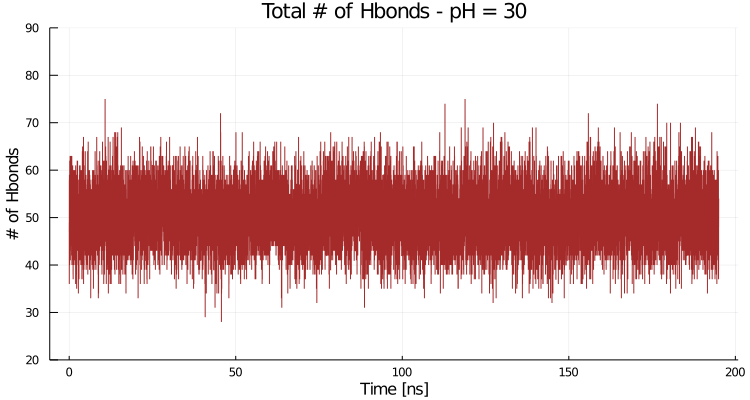

In [54]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_30,
        title = string("Total # of Hbonds - pH = ",30), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

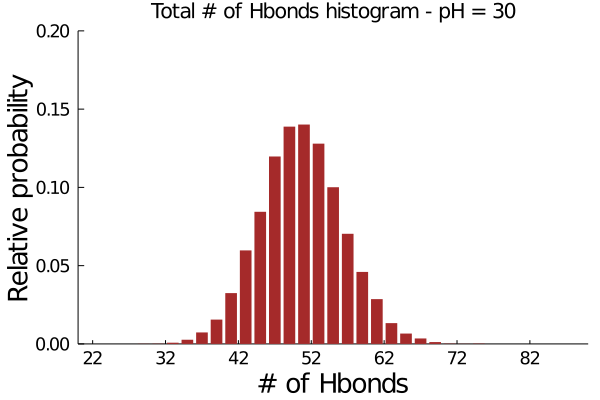

In [55]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_30))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_30, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",30),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

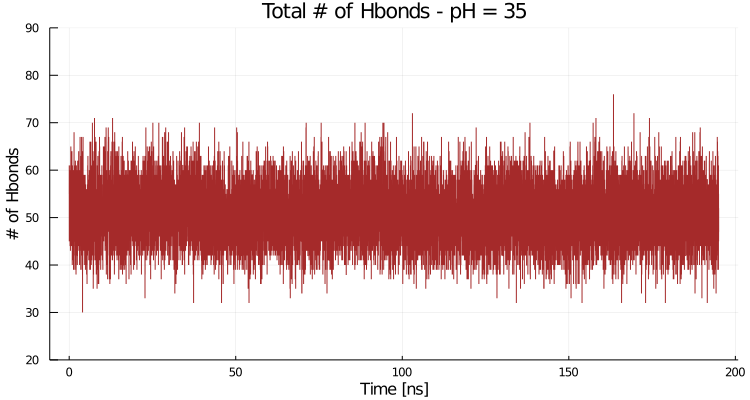

In [56]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_35,
        title = string("Total # of Hbonds - pH = ",35), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

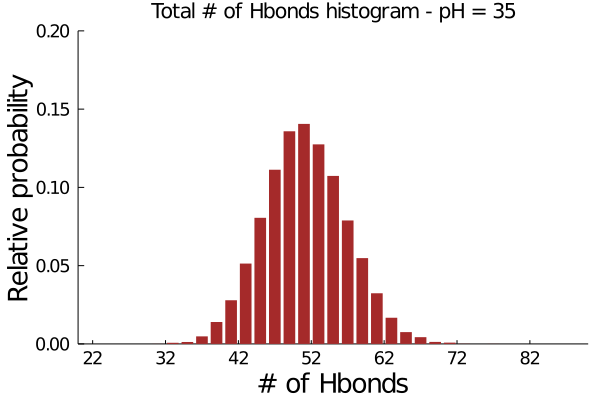

In [57]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_35))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_35, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",35),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

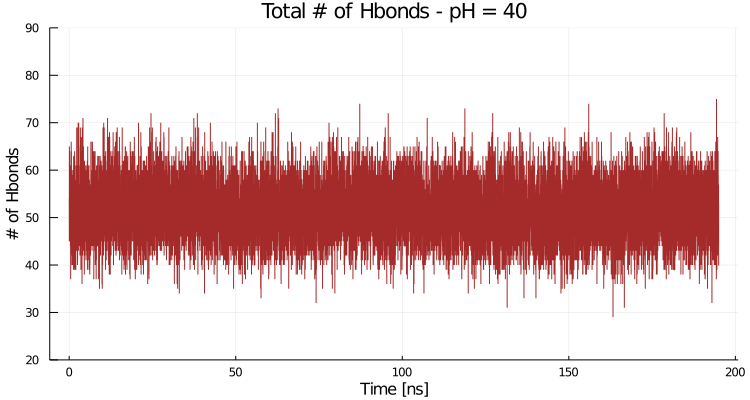

In [58]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_40,
        title = string("Total # of Hbonds - pH = ",40), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

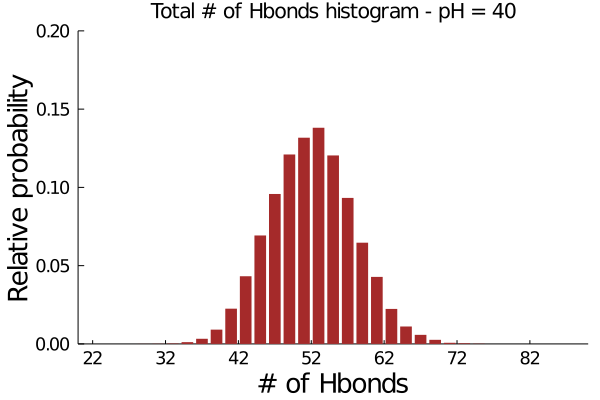

In [59]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_40))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_40, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",40),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

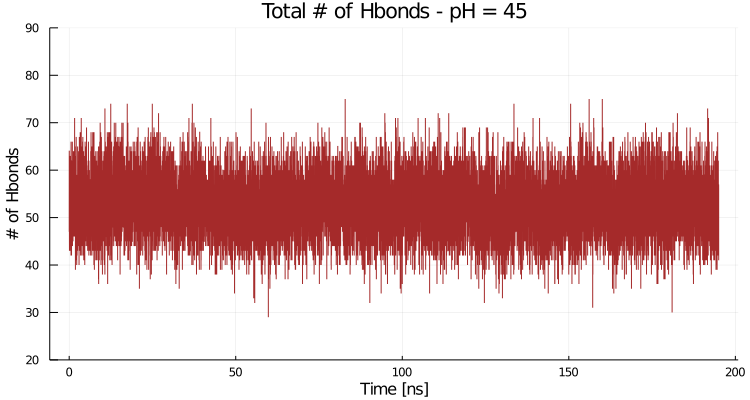

In [60]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_45,
        title = string("Total # of Hbonds - pH = ",45), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

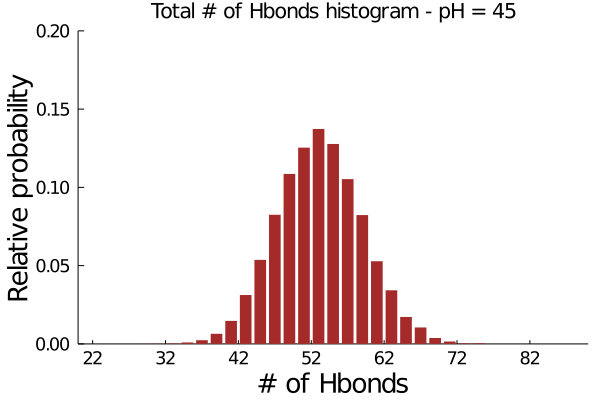

In [61]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_45))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_45, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",45),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

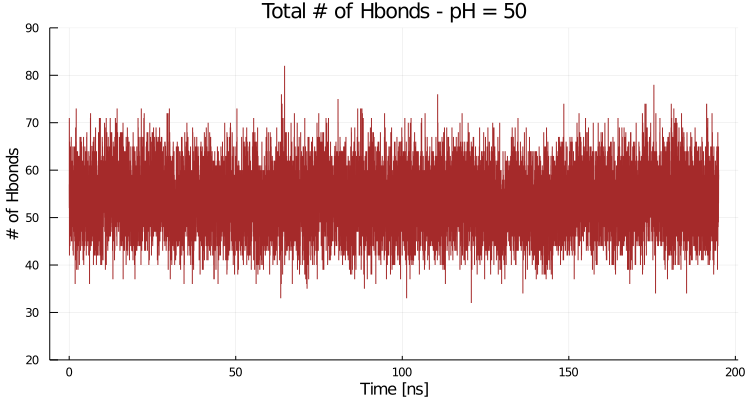

In [62]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_50,
        title = string("Total # of Hbonds - pH = ",50), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

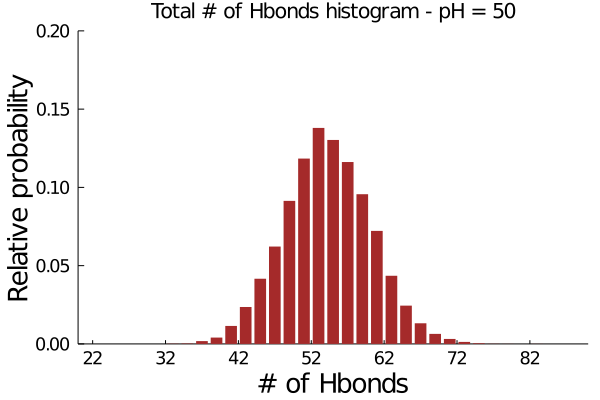

In [63]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_50))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_50, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",50),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

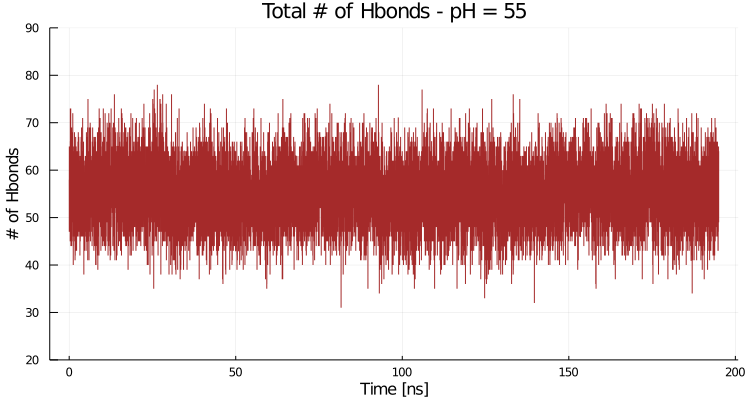

In [64]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_55,
        title = string("Total # of Hbonds - pH = ",55), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

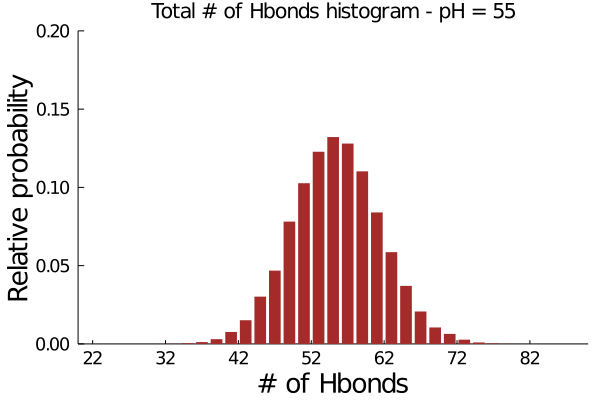

In [65]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_55))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_55, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",55),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

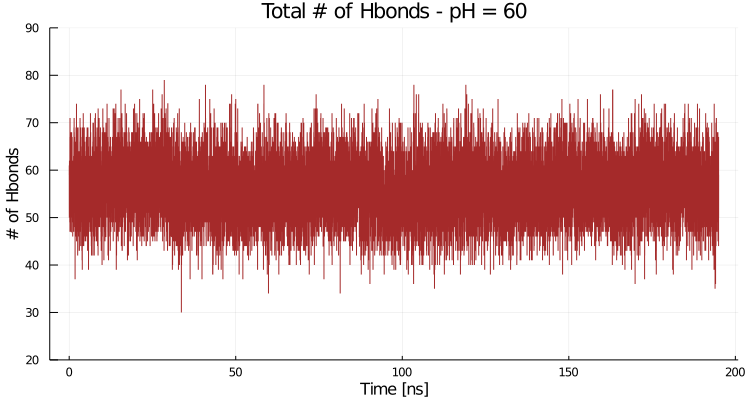

In [66]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_60,
        title = string("Total # of Hbonds - pH = ",60), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

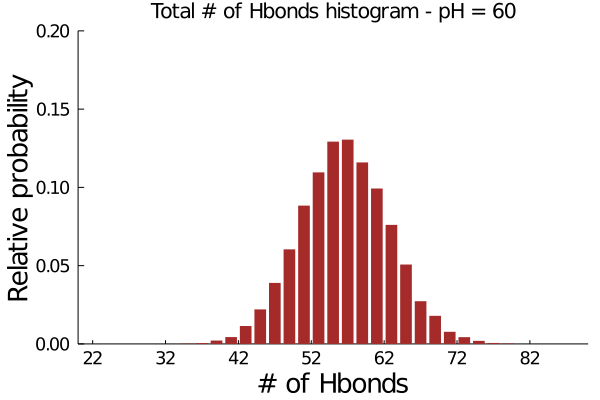

In [67]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_60))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_60, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",60),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

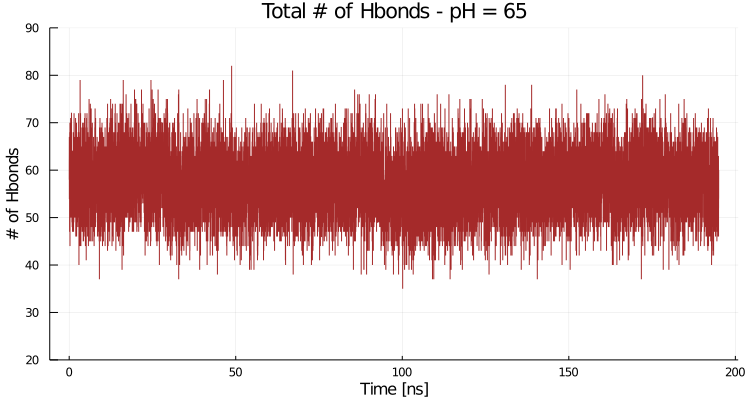

In [68]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_65,
        title = string("Total # of Hbonds - pH = ",65), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

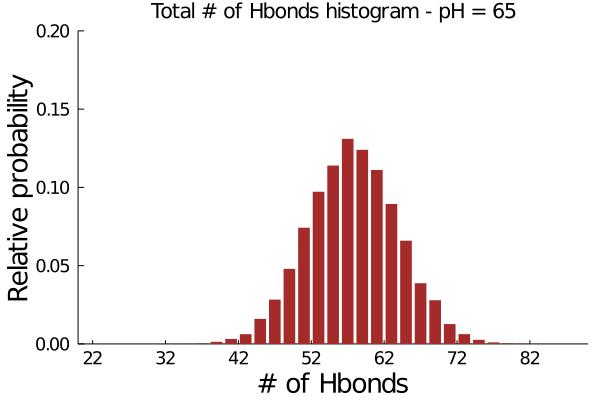

In [69]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_65))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_65, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",65),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

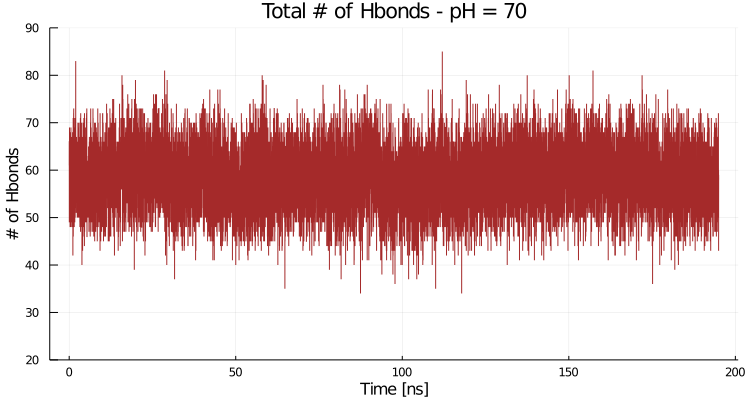

In [70]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_70,
        title = string("Total # of Hbonds - pH = ",70), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

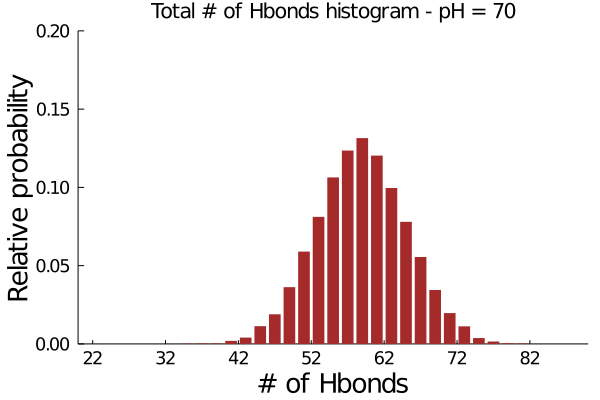

In [71]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_70))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_70, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",70),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

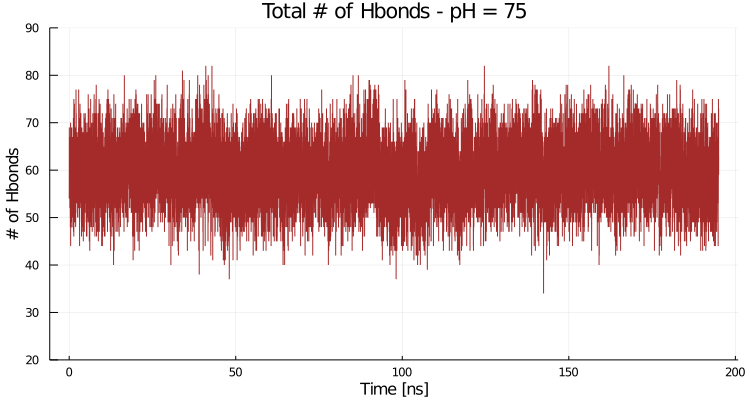

In [72]:
min_nhb = 20
    max_nhb = 90
    plot(collect(1:nstlim) ./ 100, nhb_ctv_75,
        title = string("Total # of Hbonds - pH = ",75), size = (750, 400),
        ylims = (min_nhb, max_nhb), label = false,
        linecolor = Colors.colorant"Brown",
        yaxis = "# of Hbonds", xaxis = "Time [ns]")

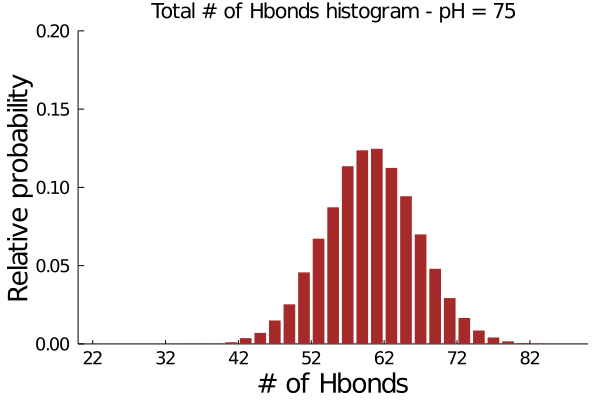

In [73]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_75))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_75, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"Brown",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("Total # of Hbonds histogram - pH = ",75),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

In [74]:
vals = vcat([ mean(nhb_ctv_30) std(nhb_ctv_30) std(nhb_ctv_30) / mean(nhb_ctv_30) ],
[ mean(nhb_ctv_35) std(nhb_ctv_35) std(nhb_ctv_35) / mean(nhb_ctv_35) ],
[ mean(nhb_ctv_40) std(nhb_ctv_40) std(nhb_ctv_40) / mean(nhb_ctv_40) ],
[ mean(nhb_ctv_45) std(nhb_ctv_45) std(nhb_ctv_45) / mean(nhb_ctv_45) ],
[ mean(nhb_ctv_50) std(nhb_ctv_50) std(nhb_ctv_50) / mean(nhb_ctv_50) ],
[ mean(nhb_ctv_55) std(nhb_ctv_55) std(nhb_ctv_55) / mean(nhb_ctv_55) ],
[ mean(nhb_ctv_60) std(nhb_ctv_60) std(nhb_ctv_60) / mean(nhb_ctv_60) ],
[ mean(nhb_ctv_65) std(nhb_ctv_65) std(nhb_ctv_65) / mean(nhb_ctv_65) ],
[ mean(nhb_ctv_70) std(nhb_ctv_70) std(nhb_ctv_70) / mean(nhb_ctv_70) ],
[ mean(nhb_ctv_75) std(nhb_ctv_75) std(nhb_ctv_75) / mean(nhb_ctv_75) ])

NamedArray(vals, (string.(phs), ["μ" ; "std" ; "μ/std"]))

10×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
30    │  50.1554   5.66947  0.113038
35    │  50.6786    5.6686  0.111854
40    │  51.5592   5.75492  0.111618
45    │  52.6436   5.85767   0.11127
50    │  53.7151   5.91592  0.110135
55    │  54.9449   6.04438  0.110008
60    │  56.0591   6.11102   0.10901
65    │  57.2414   6.15549  0.107536
70    │  58.3988   6.16803  0.105619
75    │  59.6841   6.32286  0.105939

## hbonds count por idx

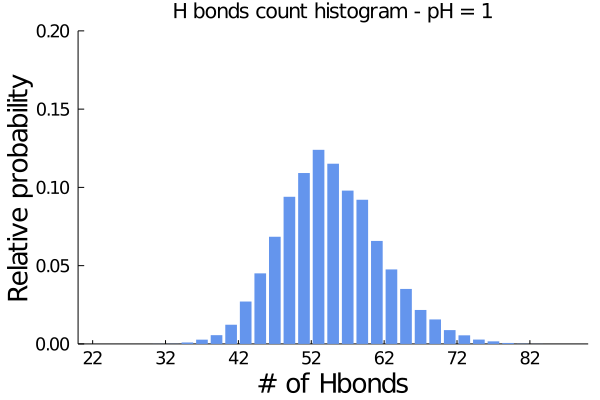

In [75]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_1))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_1, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 1),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

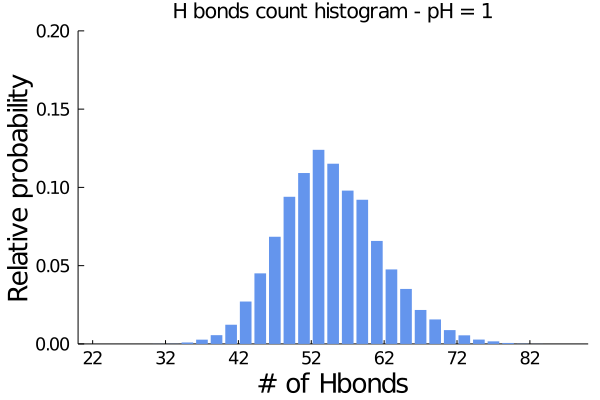

In [76]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_1))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_1, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 1),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

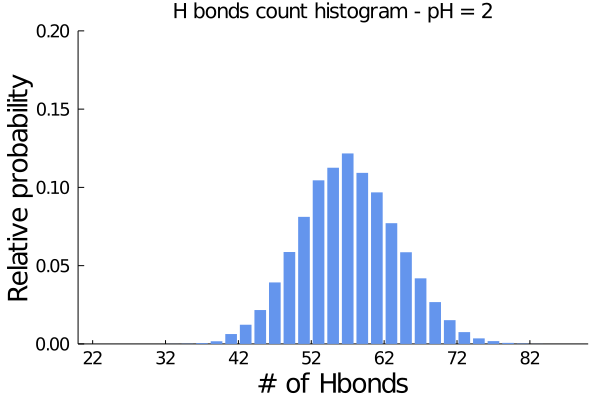

In [77]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_2))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_2, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 2),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

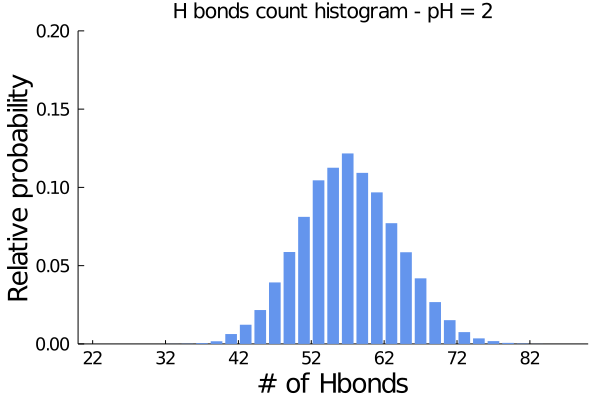

In [78]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_2))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_2, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 2),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

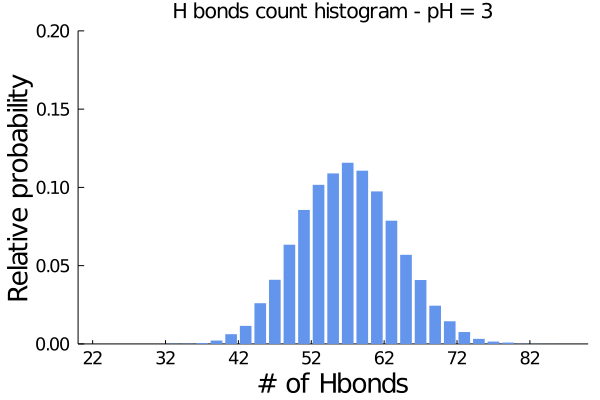

In [79]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_3))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_3, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 3),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

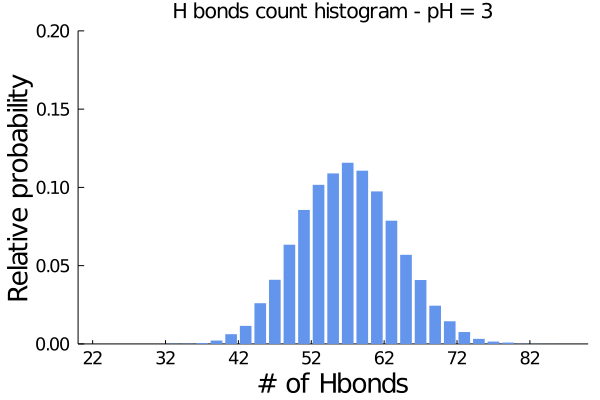

In [80]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_3))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_3, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 3),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

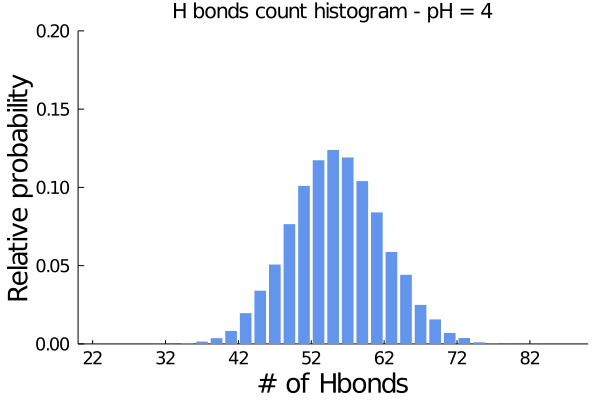

In [81]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_4))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_4, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 4),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

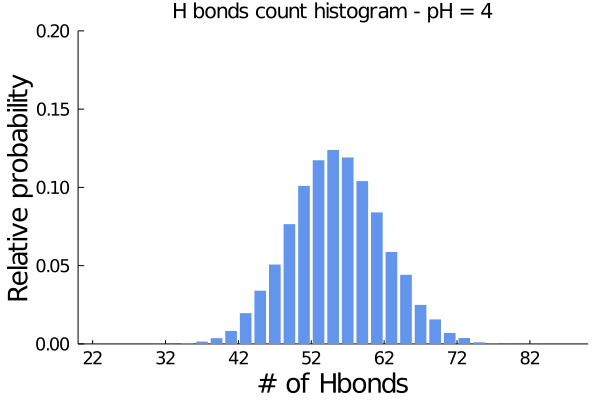

In [82]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_4))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_4, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 4),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

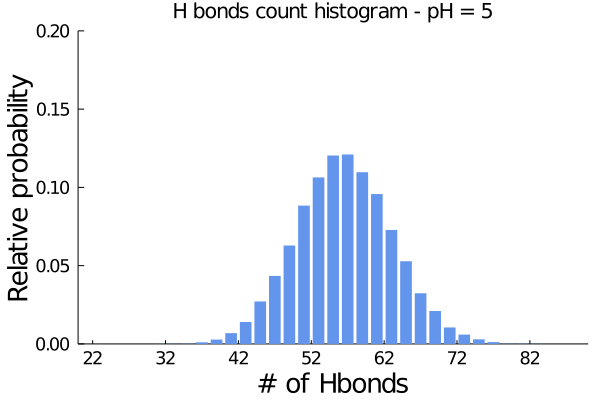

In [83]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_5))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_5, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 5),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

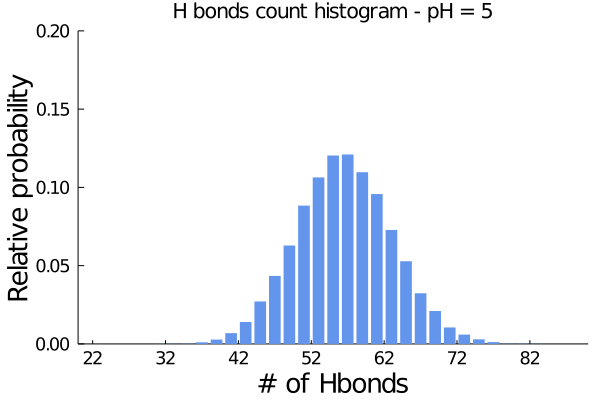

In [84]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_5))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_5, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 5),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

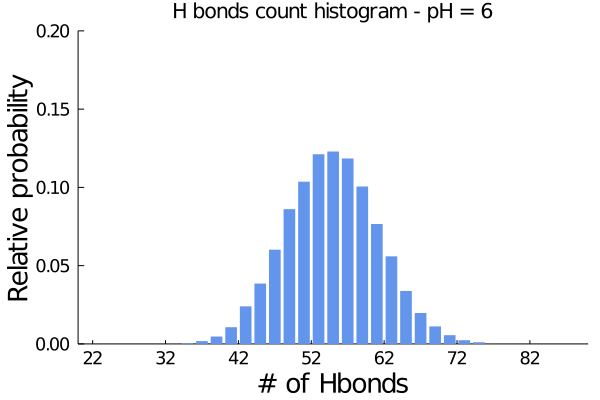

In [85]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_6))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_6, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 6),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

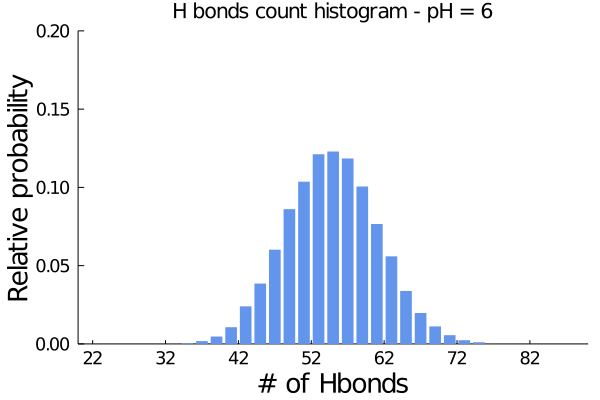

In [86]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_6))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_6, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 6),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

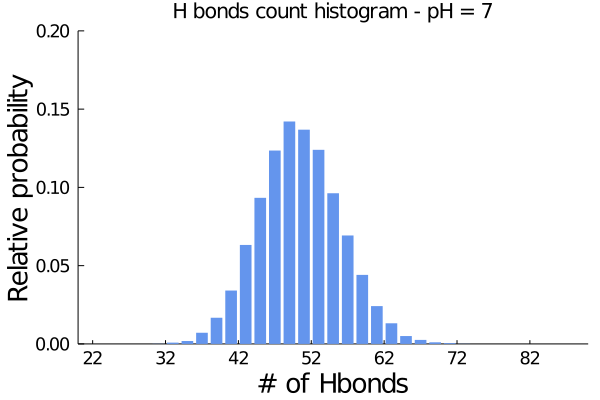

In [87]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_7))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_7, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 7),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

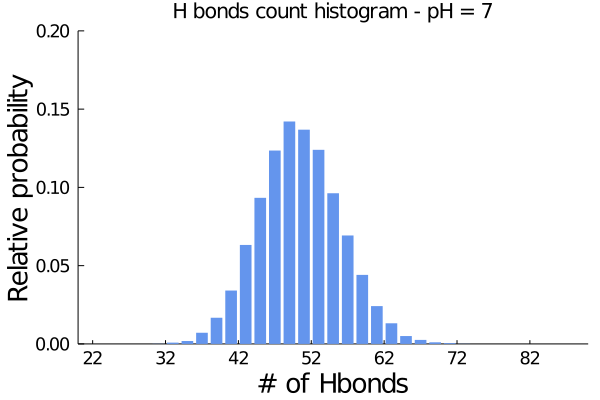

In [88]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_7))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_7, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 7),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

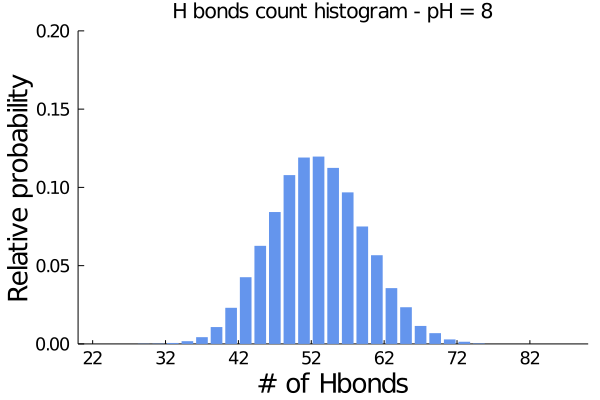

In [89]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_8))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_8, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 8),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

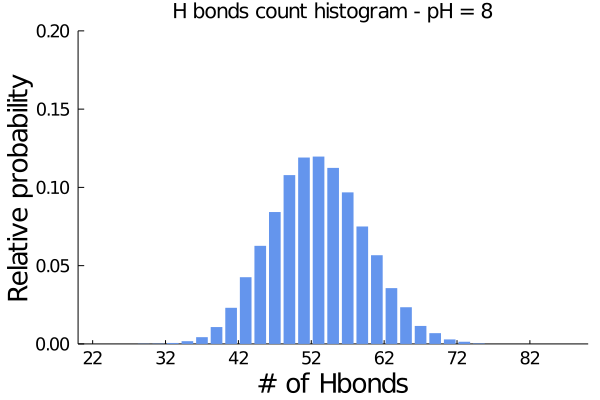

In [90]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_8))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_8, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 8),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

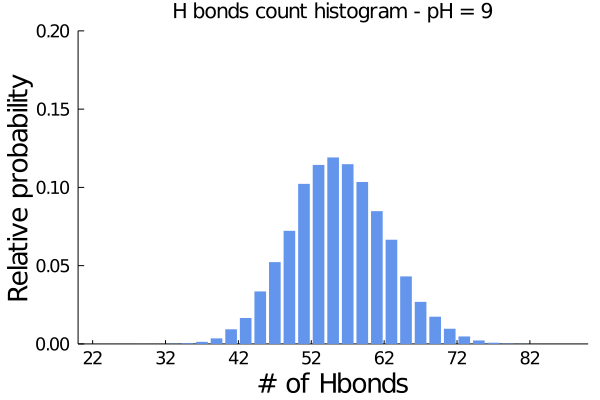

In [91]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_9))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_9, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 9),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

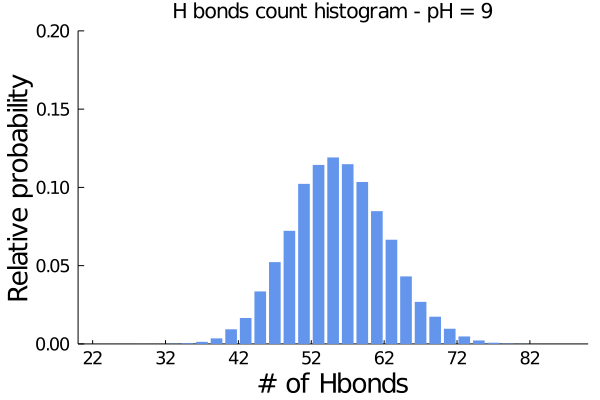

In [92]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_9))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_9, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 9),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

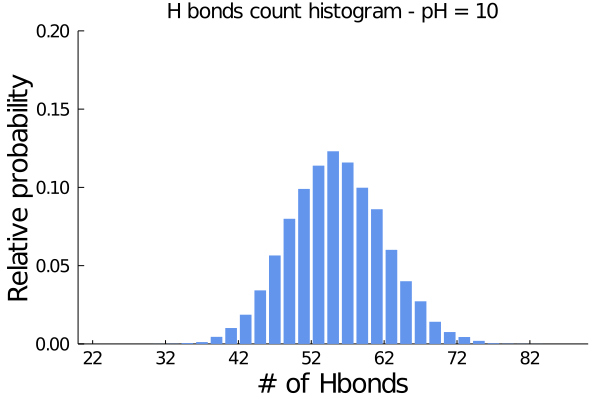

In [93]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_10))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_10, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 10),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

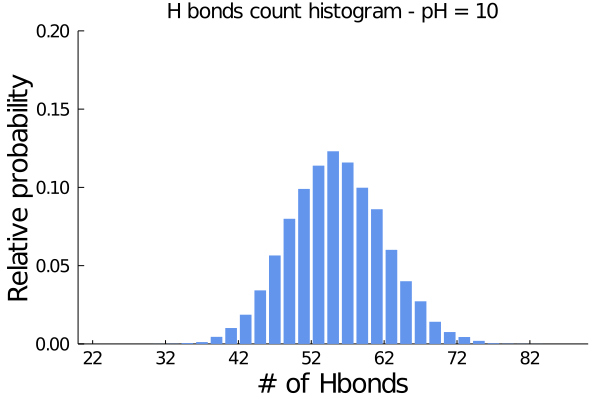

In [94]:
st = 2
    bin_nhb = collect(min_nhb:st:max_nhb)
    wgh_nhb = fill(1.0, length(nhb_ctv_10))
    
    # Histograma ponderado
    Wbins_nhb, Whis_nhb = JUMD.weightedHist(nhb_ctv_10, bin_nhb, wgh_nhb, true, false);
    
    bar(Wbins_nhb, Whis_nhb,
        xlims = (min_nhb, max_nhb), ylims = (0, .2),
        xticks = min_nhb+st:10:max_nhb+st,
        linecolor = false, fillcolor = Colors.colorant"CornflowerBlue",
        grid = false, legend = false,
        guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
        legendfont = font(12, "Arial"),
        title = string("H bonds count histogram - pH = ", 10),
        yaxis = "Relative probability", xaxis = "# of Hbonds")

In [95]:
vals = vcat([ mean(nhb_ctv_1) std(nhb_ctv_1) std(nhb_ctv_1) / mean(nhb_ctv_1) ],
[ mean(nhb_ctv_2) std(nhb_ctv_2) std(nhb_ctv_2) / mean(nhb_ctv_2) ],
[ mean(nhb_ctv_3) std(nhb_ctv_3) std(nhb_ctv_3) / mean(nhb_ctv_3) ],
[ mean(nhb_ctv_4) std(nhb_ctv_4) std(nhb_ctv_4) / mean(nhb_ctv_4) ],
[ mean(nhb_ctv_5) std(nhb_ctv_5) std(nhb_ctv_5) / mean(nhb_ctv_5) ],
[ mean(nhb_ctv_6) std(nhb_ctv_6) std(nhb_ctv_6) / mean(nhb_ctv_6) ],
[ mean(nhb_ctv_7) std(nhb_ctv_7) std(nhb_ctv_7) / mean(nhb_ctv_7) ],
[ mean(nhb_ctv_8) std(nhb_ctv_8) std(nhb_ctv_8) / mean(nhb_ctv_8) ],
[ mean(nhb_ctv_9) std(nhb_ctv_9) std(nhb_ctv_9) / mean(nhb_ctv_9) ],
[ mean(nhb_ctv_10) std(nhb_ctv_10) std(nhb_ctv_10) / mean(nhb_ctv_10) ])

NamedArray(vals, (string.(idx), ["μ" ; "std" ; "μ/std"]))

10×3 Named Array{Float64,2}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
1     │  54.1155   6.82235   0.12607
2     │  56.6575   6.64662  0.117312
3     │  56.4967   6.69515  0.118505
4     │  54.9972   6.38626   0.11612
5     │  56.0191   6.52458  0.116471
6     │  54.3331   6.31461   0.11622
7     │  49.9114   5.58773  0.111953
8     │  52.3626   6.46544  0.123475
9     │  55.2457   6.55944  0.118732
10    │  54.9416   6.50654  0.118426

## hbonds count por idx

In [96]:
nhb_cnt_ctv_acc_phs = Array{Int64, 2}(undef, aa, 0)
nhb_cnt_ctv_don_phs = Array{Int64, 2}(undef, aa, 0)

for ph in phs
    nhb_ser_ctv_acc_ph = fill(0, (aa, nstlim))
    nhb_ser_ctv_don_ph = fill(0, (aa, nstlim))
    
    temporal_acc = readdlm(joinpath(dir_ctv_hbo, string(ph, "ph"),
        string("series_nhb_ctv_gl4_as4_lys_acc_", ph)), header = true)
    
    temporal_don = readdlm(joinpath(dir_ctv_hbo, string(ph, "ph"),
        string("series_nhb_ctv_gl4_as4_lys_don_", ph)), header = true)
    
    res_hbo_ctv_acc_phs = convert(Array{Bool, 2}, temporal_acc[1][:, 2:end])
    acceptor_donor_acc = convert(Array{String, 1}, temporal_acc[2][2:end])
    
    res_hbo_ctv_don_phs = convert(Array{Bool, 2}, temporal_don[1][:, 2:end])
    acceptor_donor_don = convert(Array{String, 1}, temporal_don[2][2:end])
    

    for i = 1:nstlim  
        mascara_acc = findall(res_hbo_ctv_acc_phs[i, :])
        mascara_don = findall(res_hbo_ctv_don_phs[i, :])
        
        for j in mascara_acc
            acceptor, donor = split(acceptor_donor_acc[j], "-")
            don = parse(Int64, split(split(donor, "_")[2], "@")[1])
            acc = parse(Int64, split(split(acceptor, "_")[2], "@")[1])
            nhb_ser_ctv_acc_ph[don, i] += 1
            nhb_ser_ctv_acc_ph[acc, i] += 1
        end
        
        for j in mascara_don
            acceptor, donor = split(acceptor_donor_don[j], "-")
            acc = parse(Int64, split(split(acceptor, "_")[2], "@")[1])
            don = parse(Int64, split(split(donor, "_")[2], "@")[1])
            nhb_ser_ctv_don_ph[don, i] += 1
            nhb_ser_ctv_don_ph[acc, i] += 1
        end
    end

    nhb_cnt_ctv_acc_ph = mapslices(x -> sum(x), nhb_ser_ctv_acc_ph, dims = 2)[:, 1]
    global nhb_cnt_ctv_acc_phs = hcat(nhb_cnt_ctv_acc_phs, nhb_cnt_ctv_acc_ph)
    
    nhb_cnt_ctv_don_ph = mapslices(x -> sum(x), nhb_ser_ctv_don_ph, dims = 2)[:, 1]
    global nhb_cnt_ctv_don_phs = hcat(nhb_cnt_ctv_don_phs, nhb_cnt_ctv_don_ph)
    
end

In [97]:
nhb_cnt_ctv_phs = nhb_cnt_ctv_acc_phs .+ nhb_cnt_ctv_don_phs;

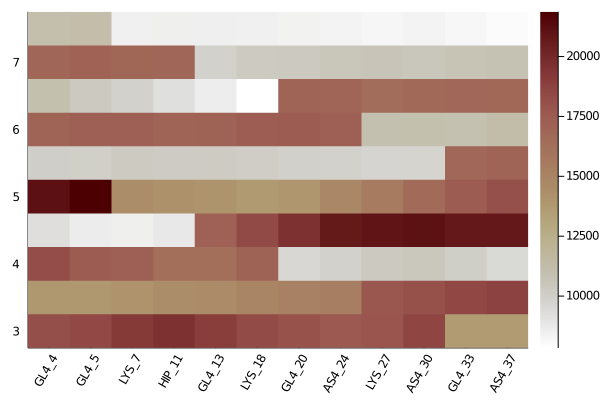

In [98]:
heatmap(titratable_residues[1:12], (phs ./ 10), nhb_cnt_ctv_phs[titratable_resis[1:12], :],
    xrotation = 60, color = :bilbao)

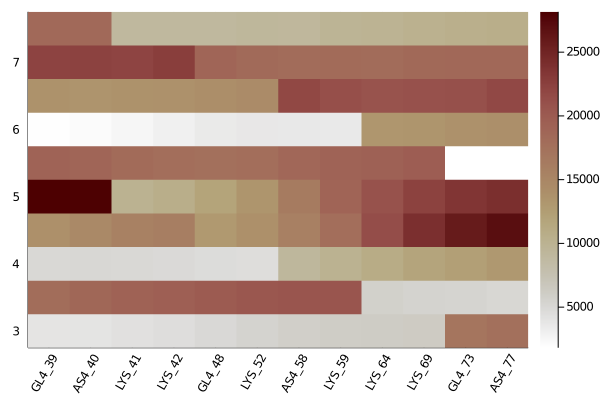

In [99]:
heatmap(titratable_residues[13:24], (phs ./ 10), nhb_cnt_ctv_phs[titratable_resis[13:24], :],
    xrotation = 60, color = :bilbao)

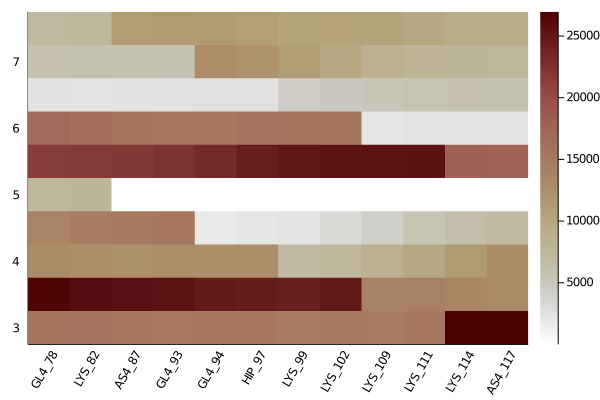

In [100]:
heatmap(titratable_residues[25:end], (phs ./ 10), nhb_cnt_ctv_phs[titratable_resis[25:end], :],
    xrotation = 60, color = :bilbao)